<a href="https://colab.research.google.com/github/JinFree/Image_Classification_with_DL_in_Colab/blob/master/PyTorch/PyTorch_Image_Inference_ver_book.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
!unzip -qq cats_and_dogs_filtered.zip

--2020-04-05 11:46:36--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.128, 2404:6800:4008:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  63.8MB/s    in 1.0s    

2020-04-05 11:46:37 (63.8 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
import os
PATH = "/content/cats_and_dogs_filtered/validation"
validation_cats_dir = PATH + '/cats'  # directory with our validation cat pictures
validation_dogs_dir = PATH + '/dogs'  # directory with our validation dog pictures
list_of_test_cats_images = os.listdir(validation_cats_dir)
list_of_test_dogs_images = os.listdir(validation_dogs_dir)
for idx in range(len(list_of_test_cats_images)):
    list_of_test_cats_images[idx] = validation_cats_dir + '/'+list_of_test_cats_images[idx]
for idx in range(len(list_of_test_dogs_images)):
    list_of_test_dogs_images[idx] = validation_dogs_dir + '/'+list_of_test_dogs_images[idx]
list_of_test_images = list_of_test_cats_images + list_of_test_dogs_images

In [0]:
'''
pytorch_network_model.py

import torch
from torchvision import models
import torch.nn as nn
import torch.nn.functional as F

class MODEL(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.network = models.mobilenet_v2(pretrained=False)
        self.classifier = nn.Sequential(
            nn.Dropout()
            , nn.Linear(1000, num_classes)
            , nn.Sigmoid()
        )
    def forward(self, x):
        x = self.network(x)
        return self.classifier(x)
'''

In [0]:
'''
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

def load_label_map(textFile):
    return np.loadtxt(textFile, str, delimiter='\t')
    
def cv_image_read(image_path):
    print(image_path)
    return cv2.imread(image_path)

def show_image(cv_image):
    rgb = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(rgb)
    plt.show()
    
def print_result(inference_result, class_map):
    class_text = class_map[np.argmax(inference_result)]
    print(inference_result)
    print(class_text)

def inference_image(opencv_image, transform_info, model, DEVICE):
    image = Image.fromarray(opencv_image)
    image_tensor = transform_info(image)
    image_tensor = image_tensor.unsqueeze(0)
    image_tensor = image_tensor.to(DEVICE)
    result = model(image_tensor)
    return result
'''    

In [0]:
import os
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
import torchvision.transforms as transforms
from pytorch_network_model import MODEL

def main(image_path):
    USE_CUDA = torch.cuda.is_available()
    DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

    img_width, img_height = 224, 224
    transform_info = transforms.Compose([
                transforms.Resize(size=(img_width, img_height))
                , transforms.ToTensor()
                    ])
    class_map = np.loadtxt("label_map.txt", str, delimiter='\t')
    num_classes = len(class_map)

    model = MODEL(num_classes).to(DEVICE)
    model_str = "PyTorch_Classification_Model"
    model_str += ".pt" 

    model.load_state_dict(torch.load(model_str))
    model.eval()

    opencv_image = cv2.imread(image_path)

    image = Image.fromarray(opencv_image)
    image_tensor = transform_info(image)
    image_tensor = image_tensor.unsqueeze(0)
    image_tensor = image_tensor.to(DEVICE)
    inference_result = model(image_tensor)

    inference_result = inference_result.cpu().detach().numpy()

    class_text = class_map[np.argmax(inference_result)]
    print(inference_result)
    print(class_text)

    rgb = cv2.cvtColor(opencv_image, cv2.COLOR_BGR2RGB)
    plt.figure()
    plt.imshow(rgb)
    plt.show()

[[0.00993812 0.9989255 ]]
dogs


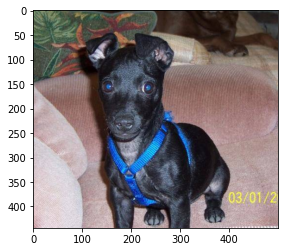

In [5]:
main(list_of_test_images[501])